In [45]:
import scipy as sp
from scipy import stats  # модуль статистических функций
import pandas as pd
import matplotlib.pyplot as plt    
from collections import Counter 
import numpy as np
import pylab 



In [2]:
df = pd.read_excel('http://www.complex-systems.meduniwien.ac.at/elections/ElectionData/UK2010.xls')

In [3]:
df.head()

,Press Association Reference,Constituency Name,Region,Election Year,Electorate,Votes,AC,AD,AGS,APNI,...,UKIP,UPS,UV,VCCA,Vote,Wessex Reg,WRP,You,Youth,YRDPL
0,1.0,Aberavon,Wales,2010.0,50838.0,30958,NaN,NaN,NaN,NaN,...,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Aberconwy,Wales,2010.0,44593.0,29966,NaN,NaN,NaN,NaN,...,632.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Aberdeen North,Scotland,2010.0,64808.0,37701,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Aberdeen South,Scotland,2010.0,64031.0,43034,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Aberdeenshire West & Kincardine,Scotland,2010.0,66110.0,45195,NaN,NaN,NaN,NaN,...,397.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns #Имена столбоцов

Index(['Press Association Reference', 'Constituency Name', 'Region',
       'Election Year', 'Electorate', 'Votes', 'AC', 'AD', 'AGS', 'APNI',
       ...
       'UKIP', 'UPS', 'UV', 'VCCA', 'Vote', 'Wessex Reg', 'WRP', 'You',
       'Youth', 'YRDPL'],
      dtype='object', length=144)

In [7]:
df['Election Year'] #Обращение к столбцу

0      2010.0
1      2010.0
2      2010.0
3      2010.0
4      2010.0
        ...  
646    2010.0
647    2010.0
648    2010.0
649    2010.0
650       NaN
Name: Election Year, Length: 651, dtype: float64

In [8]:
df['Election Year'].unique() #Получение уникальных значений

array([2010.,   nan])

In [10]:
Counter(df['Election Year'])

Counter({2010.0: 650, nan: 1})

In [12]:
df[df['Election Year'].isna()] #Строки, в которых значение Election Year равно NaN

,Press Association Reference,Constituency Name,Region,Election Year,Electorate,Votes,AC,AD,AGS,APNI,...,UKIP,UPS,UV,VCCA,Vote,Wessex Reg,WRP,You,Youth,YRDPL
650,NaN,NaN,NaN,NaN,NaN,29687604,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df['Electorate'].count() #Количетство записей

650

In [15]:
df['Electorate'].mean() #Среднее значение

70149.94

In [16]:
df['Electorate'].median() #Медиана

70813.5

In [19]:
df['Electorate'].var() #Дисперсия

58962151.070354395

In [20]:
df['Electorate'].std() #Стандартное отклонение

7678.681597146375

In [23]:
df['Electorate'].quantile([0, 0.25, 0.5, 0.75, 1]) #Квартили

0.00     21780.00
0.25     65929.25
0.50     70813.50
0.75     74948.50
1.00    109922.00
Name: Electorate, dtype: float64

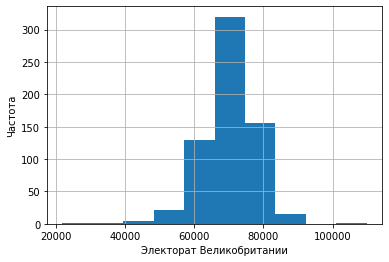

In [24]:
#Построение гистрограммы
df['Electorate'].hist()
plt.xlabel('Электорат Великобритании')
plt.ylabel('Частота')
plt.show()

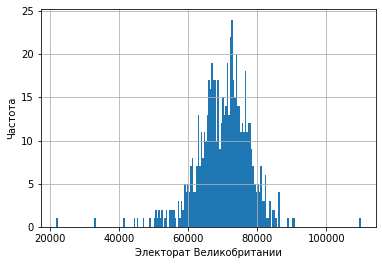

In [26]:
df['Electorate'].hist(bins=200)
plt.xlabel('Электорат Великобритании')
plt.ylabel('Частота')
plt.show()

In [58]:
#Мода
df['Electorate'].mode()

KeyError: 'Electorate'

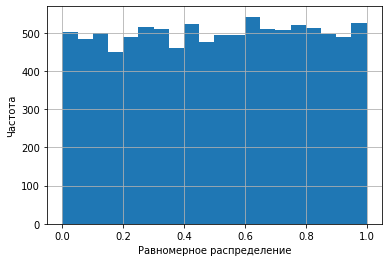

In [29]:
#Генерируем равномерное распределение
xs = stats.uniform.rvs(0, 1, 10000)
pd.Series(xs).hist(bins=20)
plt.xlabel('Равномерное распределение')
plt.ylabel('Частота')
plt.show()    

In [31]:
def bootstrap(xs, n, replace=True): 
    '''Вернуть список массивов меньших размеров 
       по n элементов каждый'''
    return np.random.choice(xs, (len(xs), n), replace=replace)

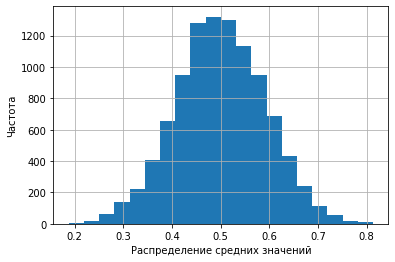

In [32]:
xs = stats.uniform.rvs(loc=0, scale=1, size=10000)
pd.Series( map(sp.mean, bootstrap(xs, 10)) ).hist(bins=20)
plt.xlabel('Распределение средних значений') 
plt.ylabel('Частота')
plt.show()

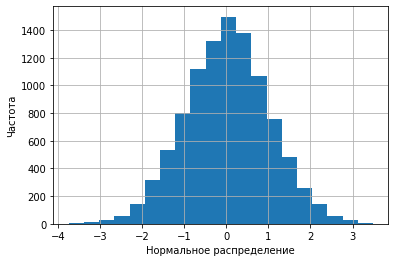

In [33]:
xs = stats.norm.rvs(loc=0, scale=1, size=10000)
pd.Series(xs).hist(bins=20)
plt.xlabel('Нормальное распределение')
plt.ylabel('Частота')
plt.show()

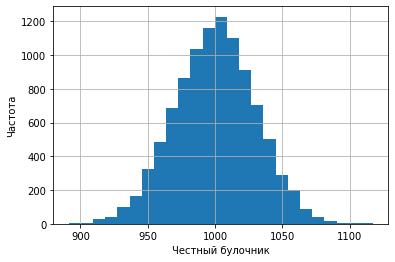

In [37]:
pd.Series(stats.norm.rvs(1000, 30, 10000)).hist(bins=25)
plt.xlabel('Честный булочник') 
plt.ylabel('Частота')
plt.show()

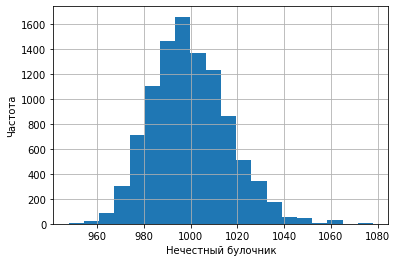

In [41]:
xs = stats.norm.rvs(950, 30, size=10000) 
pd.Series( map(max, bootstrap(xs, 13)) ).hist(bins=20)
plt.xlabel('Нечестный булочник') 
plt.ylabel('Частота')
plt.show()

In [44]:
#Измерение асимметрии
xs = stats.norm.rvs(950, 30, size=10000) 
s = pd.Series( map(max, bootstrap(xs, 13)) )
{   'среднее'   : s.mean(), 
    'медиана'   : s.median(), 
    'асимметрия': s.skew() }

{'среднее': 1000.4452426677717,
 'медиана': 999.4417448907028,
 'асимметрия': 0.41973650996296524}

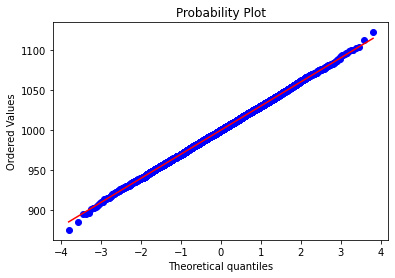

In [51]:
#QQ-plot Честный продавец
honest = pd.Series(stats.norm.rvs(1000, 30, 10000))
stats.probplot(honest, dist="norm", plot=pylab)
pylab.show()

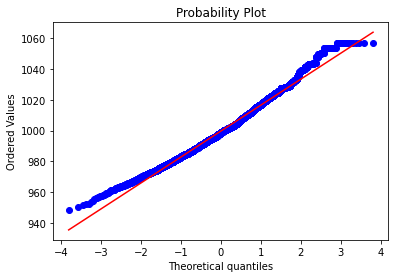

In [49]:
#QQ-plot Нечестный продавец
xs = stats.norm.rvs(950, 30, size=10000) 
dishonest = pd.Series( map(max, bootstrap(xs, 13)))
stats.probplot(dishonest, dist="norm", plot=pylab)
pylab.show()

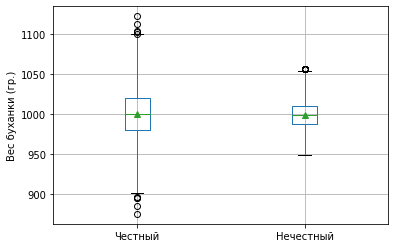

In [52]:
#Box plot
honest_and_dishonest = {"Честный": honest,
                        "Нечестный": dishonest}
pd.DataFrame(honest_and_dishonest).boxplot(sym='o', whis=1.95, showmeans=True)
plt.ylabel('Вес буханки (гр.)')
plt.show()

In [53]:
def empirical_cdf(x):
    '''Вернуть эмпирическую ИФР для x'''
    sx  = sorted(x)
    return pd.DataFrame( {0: sx, 1:sp.arange(len(sx))/len(sx)} )

C:\Users\гришша\AppData\Local\Temp\ipykernel_22256\2750930585.py:4: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  return pd.DataFrame( {0: sx, 1:sp.arange(len(sx))/len(sx)} )


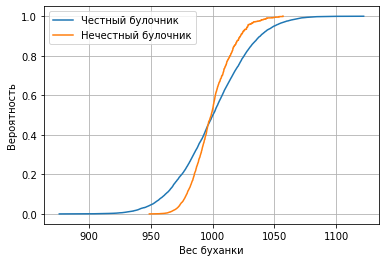

In [55]:
#Интегральная функция распределения
df  = empirical_cdf(honest)
df2 = empirical_cdf(dishonest)
ax  = df.plot(0, 1, label='Честный булочник')    
df2.plot(0, 1, label='Нечестный булочник', grid=True, ax=ax)    
plt.xlabel('Вес буханки')
plt.ylabel('Вероятность')
plt.legend(loc='best')
plt.show()

C:\Users\гришша\AppData\Local\Temp\ipykernel_22256\2750930585.py:4: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  return pd.DataFrame( {0: sx, 1:sp.arange(len(sx))/len(sx)} )


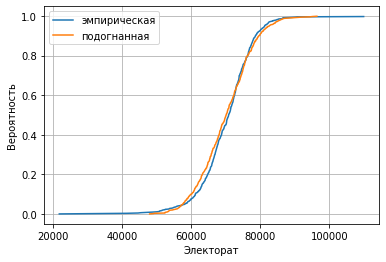

In [59]:
#Показать эмпирическую и подогнанную ИФР электората Великобритании
df = pd.read_excel('http://www.complex-systems.meduniwien.ac.at/elections/ElectionData/UK2010.xls')
emp = df['Electorate']
fitted   = stats.norm.rvs(emp.mean(), emp.std(ddof=0), len(emp))
df  = empirical_cdf(emp)
df2 = empirical_cdf(fitted)
ax  = df.plot(0, 1, label='эмпирическая')    
df2.plot(0, 1, label='подогнанная', grid=True, ax=ax)    
plt.xlabel('Электорат')
plt.ylabel('Вероятность')
plt.legend(loc='best')
plt.show()

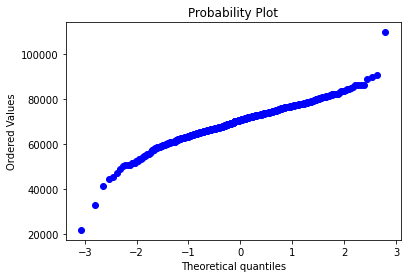

In [62]:
#Построим QQ-plot
df = pd.read_excel('http://www.complex-systems.meduniwien.ac.at/elections/ElectionData/UK2010.xls')
stats.probplot(df.Electorate, dist="norm", plot=pylab)
pylab.show()

In [63]:
#Добавление столбца
df['Победители'] = df['Con'] + df['LD']
freq = Counter(df['Con'].apply( lambda x: x > 0 ))
print('Поле "Победители": %d, в т.ч. пропущено %d' 
        % (freq[True], freq[False]))

Поле "Победители": 631, в т.ч. пропущено 20


In [65]:
#Посмотрим в каких строках пропущено значение
rule = df['Con'].isnull() & df['LD'].isnull()
df[rule][['Region', 'Electorate', 'Con', 'LD']]

,Region,Electorate,Con,LD
12,Northern Ireland,60204.0,NaN,NaN
13,Northern Ireland,73338.0,NaN,NaN
14,Northern Ireland,63054.0,NaN,NaN
44,Northern Ireland,59007.0,NaN,NaN
45,Northern Ireland,65504.0,NaN,NaN
46,Northern Ireland,59524.0,NaN,NaN
47,Northern Ireland,59522.0,NaN,NaN
107,South East,74989.0,NaN,NaN
201,Northern Ireland,60698.0,NaN,NaN
202,Northern Ireland,70784.0,NaN,NaN


In [66]:
#Уберём строки с пропущенными значениями
rule = df['Con'].notnull()
df = df[rule]
df['Победители']       = df['Con']        + df['LD'] 
df['Доля победителей'] = df['Победители'] / df['Votes'] 
df['Явка']             = df['Votes']      / df['Electorate']

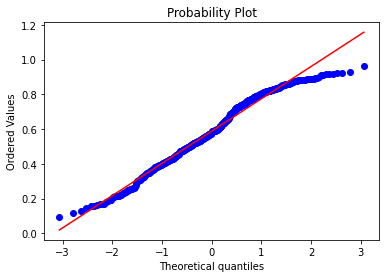

In [67]:
stats.probplot(df['Доля победителей'], dist="norm", plot=pylab)
pylab.show()

In [89]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2

r = urllib2.urlopen('http://www.complex-systems.meduniwien.ac.at/elections/ElectionData/Russia2011.zip').read()
file = ZipFile(BytesIO(r))
excel = file.open("Russia2011_1of2.xls")
russia_df = pd.read_excel(excel)
russia_df.head()

,Code for district,"Number of the polling district (unique to state, not overall)",Name of district,Number of voters included in voters list,The number of ballots received by the precinct election commission,The number of ballots issued to voters who voted early,The number of ballots issued to voters at the polling,The number of ballots issued to voters outside the polling station,The number of canceled ballots,The number of ballots in mobile ballot boxes,...,Number of lost absentee ballots,The number of lost ballots,The number of ballots not recorded after being obtained,A Just Russia,Liberal Democratic Party of Russia,Patriots of Russia,Communist Party,"Russian United Democratic Party ""Yabloko""",United Russia,Right Cause
0,1,241,adygei,179,170,0,128,10,32,10,...,0,0,0,6,12,4,35,1,80,0
1,1,231,adygei,602,555,0,355,54,146,54,...,0,0,0,40,5,3,118,7,235,1
2,1,236,adygei,700,646,0,377,45,224,45,...,0,0,0,2,2,1,122,1,292,2
3,1,239,adygei,560,540,0,309,23,208,23,...,0,0,0,34,5,3,138,6,134,4
4,1,230,adygei,161,154,0,125,7,22,7,...,0,0,0,3,7,1,25,2,93,0


In [90]:
russia_df.columns

Index(['Code for district',
       'Number of the polling district (unique to state, not overall)',
       'Name of district', 'Number of voters included in voters list',
       'The number of ballots received by the precinct election commission',
       'The number of ballots issued to voters who voted early',
       'The number of ballots issued to voters at the polling',
       'The number of ballots issued to voters outside the polling station',
       'The number of canceled ballots',
       'The number of ballots in mobile ballot boxes',
       'The number of ballots in the stationary ballot boxes',
       'Number of invalid ballots', 'Number of valid ballots',
       'The number of absentee ballots received by the precinct election commission',
       'The number of absentee ballots issued to voters at a polling station',
       'The number of voters who voted with absentee ballots at a polling station',
       'The number of the unused absentee ballots',
       'The number of a

In [96]:
#Переименуем некоторые столбцы
russia_df = russia_df.rename(columns={'Number of voters included in voters list': 'Electorat',
                                        'United Russia': 'Winner',
                                        'Number of valid ballots': 'Valid Ballots'})

In [98]:
russia_df['Доля победителя'] = russia_df.Winner / russia_df['Valid Ballots']  
russia_df['Явка'] = russia_df['Valid Ballots'] / russia_df['Electorat'] 

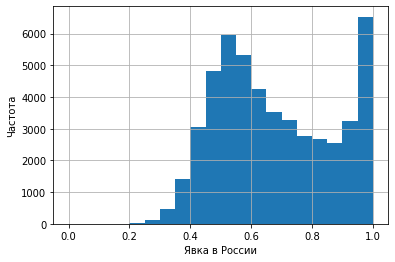

In [99]:
#Посмотрим на распределение явки
russia_df['Явка'].hist(bins=20)
plt.xlabel('Явка в России') 
plt.ylabel('Частота')
plt.show()

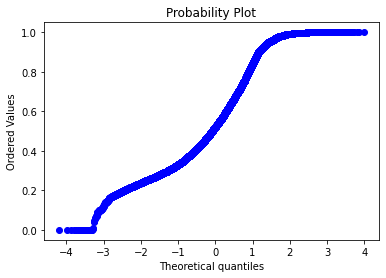

In [101]:
#Построим QQ-plot
stats.probplot(russia_df['Доля победителя'], dist="norm", plot=pylab)
pylab.show()

In [123]:
def plot_as_pmf(dt, label, ax):
    '''График функции вероятности дискретной случайной величины
       (или функции массы вероятности)'''
    s   = pd.cut(dt, bins=40, labels=False)      # разбить на 40 корзин 
    pmf = s.value_counts().sort_index() / len(s) # подсчитать кво в корзинах
    newax = pmf.plot(label=label, grid=True, ax=ax)   
    return newax

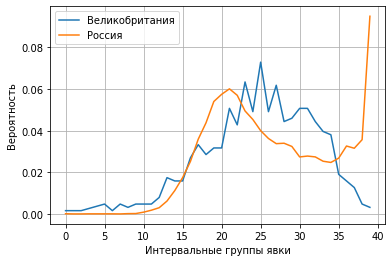

In [124]:
ax = plot_as_pmf(df['Явка'], 'Великобритания', None)
plot_as_pmf(russia_df['Явка'], 'Россия', ax)
plt.xlabel('Интервальные группы явки')   # Частотные корзины
plt.ylabel('Вероятность')
plt.legend(loc='best')
plt.show()

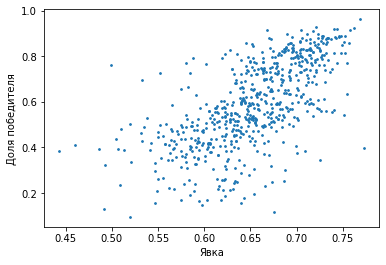

In [126]:
df_sample = df[ ['Явка', 'Доля победителей'] ]
df_sample.plot.scatter(0, 1, s=3)
plt.xlabel('Явка')
plt.ylabel('Доля победителя')
plt.show()

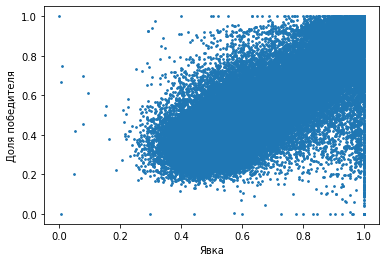

In [128]:
russia_df_sample = russia_df[ ['Явка', 'Доля победителя'] ]
russia_df_sample.plot.scatter(0, 1, s=3)
plt.xlabel('Явка')
plt.ylabel('Доля победителя')
plt.show()

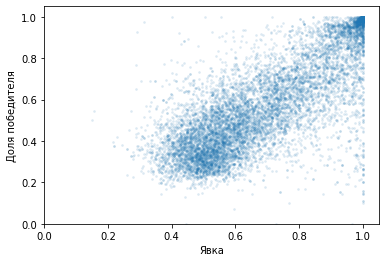

In [131]:
russia_df_sample = russia_df[['Явка', 'Доля победителя'] ]
rows = sp.random.choice(russia_df_sample.index.values, 10000)
russia_df_sample.loc[rows].plot.scatter(0, 1, s=3, alpha=0.1)
plt.xlabel('Явка')
plt.ylabel('Доля победителя')
plt.axis([0, 1.05, 0, 1.05])
plt.show()